In [0]:
### PREAMBLE
# Visualization
# visualization.svg

import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

%matplotlib inline
%config InlineBackend.figure_format = 'svg'


## Introduction

Despite having only one lecture in this class fully devoted to the topic (though of course, virtually every other lecture will try as much as possible to integrate visualization whenever possible), visualization is a cornerstone of data science.  Although data managment, graph methods, map-reduce, machine learning, etc, often show up as the "skills" needed in data science positions, the reality is that learning how to visualize the data _before_ applying more sophisticated method, remains one of the hallmarks of an effective data scientist.

Before discussing visualization in detail, though, it is important to emphasize a distinction between two _very_ different concepts that people both describing using the umbrella term "visualization".  The first of these is "visualization for data exploration": using visualization to understand (that is, to undrstand yourself) a collection of data for the purposes of further analysis.  In a short phrase, this type of visualization has the goal of you "finding what is true" within the data.  The alternative is "visualization for presentation": distilling some aspect of the data into an easily-understandable figure or chart that conveys to a broad audience some very particular aspect of the data that you want to convey.  To again put it shortly, this type of visualization is about "convincing other people your finding is true".

This class will focus almost entirely on the first type of visualization: using visual presentation to understand the data for your own purposes, for the sake of futher analysis and/or eventually creating a "presentation-based" visualization at a later point.  While there is certainly overlap between the two types of visualization (techniques that made it difficult for a broad audience to understand some fact about the data can just as easily cause you to miss the point when exploring the data), but data visualization as presentation does afford us some degree of looseness with it comes to the more stylistic aspects of data science.  We are, generally speaking, ok with "ugly" plots (as long as the ugliness doesn't prevent us from seeing the relevant features of the data), or or "busy" figures (as long as we are willing to invest the time to understand each element).  These aspects of course would not go over well when it comes to data presentation.  We may try to touch briefly on data visualization and presentation in a later lecture, but for the time being, these notes will focus on the exploratory aspects.

**A note on visualization and machine learning**:  It also hopefully goes without saying that visualization itself is merely one tool for data exploration, and that most of the analysis methods we cover in this course, including virtually all the machine learning approachs, can also serve as approaches to data exploration.  But (and this is a point we'll repeat extensively when we discuss machine learning in the course), a good rule of thumb in most machine learning algorithm is that _if you can't see the pattern you're trying to predict, neither will a machine learning algorithm_.  This is an important point to emphasize especially in light of the rise in (narrowly-defined of course) "superhuman" AI or ML algorithms that often comes up in popular press discussion of these fields: examples like Atari game playing or AlphaGo are frequently cited as cases where an AI system can outperform humans.  The unstated implication, then, is that in data science regimes we just need to give an algorithm access to all the data (much more than a human could ever process), and it will generate superhuman insights.  But this typically _not_ illustrative of the actual scenarios you will encounter in data science.  Yes, there exist cases where ML algorithms can outperform humans, but these are few and far between, and typically require many years of work to reach that point.  Instead, the goal of ML algorithms should be thought of as automating some tasks that humans are already quite capable of: that is, can they identify patterns that we can already see in the data, but do so in a more automatic and scalable manner?  And usually the only way to test what we _can_ see in the data is to visualize it.  That means that the best possible indication we have of whether or not a machine learning algorithm will "work" for a some given data problem is to visualize the data ourselves, and see if we can solve the problem.  This point will come up repeatedly in this course, but because visualization is so central to evaluating this claim, it is worth highlighting here.

### Visualization vs. statistics
Another point is worth making about visualizing data versus simply reporting statistics (with a small 's', as in, reporting the mean, variance, and other statistics about the data).  It is hopefully apparent, but still worth stating explicitly, that a visualization is virtually always going to provide more information that a small collection of numbers like this.  The following two distribution of points (one in blue and one in orange) have the same means standard deviations, and correlation.  

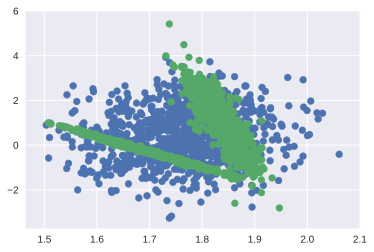

In [0]:
# this code creates two randoms distributions and scales them to have the same mean and covariance
np.random.seed(0)
x = np.random.randn(2) + np.random.randn(1000,2) @ np.random.randn(2,2)
y = np.concatenate([np.random.randn(500,2) @ np.random.randn(2,2), 
                    [4,4]+np.random.randn(500,2) @ np.random.randn(2,2)])

A = la.sqrtm(np.cov(x.T))
B = la.sqrtm(np.cov(y.T))
y = ((y - np.mean(y,0)) @ np.linalg.inv(B) @ A) + np.mean(x,0)
plt.scatter(*x.T)
plt.scatter(*y.T)

In [0]:
x.std()

1.0557160452502348

This is a mathematical property: since the $x$ and $y$ means, standard deviations, and correlation comprise just 5 numbers representing the data set, and since there are far more data points than this, by definition there will be an infinite number of (very different) data sets that share these same numbers.  In fact, in this case, it's trivial to perform an _exact_ transformation that guarantees two datasets will have these same parameters, which is exactly what we did in the figure above (the code is there, but don't worry if it's not too understandable, we are just applying a linear transform to make the second distribution match the mean and covariance of the first exactly).

The point here is that despite the temptation to summarize dat using "simple" statistics, unless you have a good sense of the full distribution of your data (best achieved via visualization), these statistics can be misleading.  People often assume "Gaussian-like" properties of data sets (more on Gaussian distributions later in the course), and when distributions are decided _non-Gaussian_, this can lead to a lot of misleading characterizations.

## Types of data

Although becoming an expert in visualization techniques is well beyond the scope of this one set of notes on the topic, there are some basic rules of thumb about data, and what types of visualizations are appropriate for these different types of data, that can help avoid some of the more "obviously incorrect" errors you may make when generating visualizations for data exploration purposes.  To get at this point, we're going to review that four "basic types" of data typically presented in Statistics courses.  There are some common sticking points to this (such as the difference between the "interval" and "ratio" types of data, that often confuse people the first time they see these categories, and which in my opinion is not _that_ crucial of a distinction in many practical data science problem, mainly because true interval-and-not-ratio data is relatively rare), but it is a useful exercise to both know these terms and to begin to think about the implications that they have regarding visualization.

These categorization, which are more frequently called "levels of measurement" or "scales of measurement" (simply refering to them as types of data I believe is more understandable, if a bit imprecise, as long as it is not confused the "data types" in the programming language sense of the word), were developed in the psychology literature [(Stevens, 1946)](http://www.jstor.org/stable/1671815?origin=JSTOR-pdf&seq=1), and there is a great deal of debate as to whether the categorizations are applicable broadly.  My goal here is not to argue for these categorizations from a philosophical standpoint, or argue that there are not important sub-categories or ambiguities within these definitions.  Nor do we make any case for this being some fundamentally rigorous classification system.  Rather, the only point here is to broadly introduce these categories as a useful, if imperfect, way of looking at different types of data, since they have been adopted as common classifications you're likely to encounter in discussions of this point.  The purpose of putting them here in this lecture on visualization is to highlight he crucial connection between the types of data you will encounter and the appropriate ways to illustrate and explore this data.

The four basic types of data are:

- **Nominal data:** categorical data with no inherent ordering between the categories.  For example, a "pet type" variable could consist of the classes {dog, cat, rabbit}, and there is no relative ordering between these two types, they are just different discrete values.
- **Ordinal data:** categorical data _with_ an inherent ordering, but where the "differences" between categories has no strictly numerical meaning.  The canonical example here are survey responses with responses such as: {strong disagree, slightly disagree, neutral, slightly agree, strongly agree}.  The important character here is that although there is a clear ordering between these types, there is no sense in which the difference between slightly agree and strongly agree is the "same" as the difference between neutral and slightly agree.
- **Interval data:** numeric data, that is, data that can be mapped to a "number line"; the important aspect in contrast with ordinal data, though, is not the "discrete versus continuous differentiation (integer values can be considered interval data, for instance), but the fact that relative differences in interval data _have_ meaning.  A classical example is temperature (in Fahrenheit or Celsius, a point which we will emphasize more shortly): here the differences between temperatures have a meaning: 10 and 15 degrees are separated by the same amount as 15 and 20 (this property is so inherent to numerical data that it almost seems strange to emphasize it).  On the other hand, interval data encompasses instances where the zero point has "no real meaning"; what this means in practice is that the _ratio_ between two data points has no meaning.  Twenty degrees Farenheit is not "twice as hot" in any meaningful sense than 10 degrees; and certainly not infinitely hotter than zero degrees.
- **Ratio data:** also numeric data, but where the ratio between measurements _does_ have some meaning.  The classical example here is temperature Kelvin.  Obviously just like temperature Fahrenheit or Celsius, this is describing the basic phenomenon of temperature, but unlike the previous cases, zero Kelvin has a meaning in terms of molecular energy in a substance (i.e., that there is none).  This means that ratios have a real meaning: a substance at 20 degrees Kelvin has twice as much kinetic energy at the molecular level as that substance as 10 degrees Kelvin.

At a course level, the first two data types can simply be viewed as "categorial" data (data taking on discrete values), whereas the later are "numerical" (taking real-valued numbers, though with the caveat that some level of discretization is acceptable even in numeric data, as long as the notion of differences are properly preserved.  Indeed, must of the later discussion on visualization will fall exactly along the categorial/real differentiation, though we will highlight some of the considerations when taking in account nominal vs. categorial and interval vs. ratio.

This can also be viewed in terms of the "allowable operations" we can perform on two data point of the different types:

- **Nominal data:** $=, \neq$.  All we can do with nominal data is compare two data points and test if they are equal or not.
- **Ordinal data:** $=, \neq, <, >$. In addition to checking for equality, we can also compare the ordering of different data points.
- **Interval data:** $=, \neq, <, >, -$. We have all the operations of ordinal data, but can also compute exact numeric differences between two data points.  Depending on context we may say that addition is allowed too, but sometimes addition actually assumes a zero point and so would only apply to ratio data.
- **Ratio data:** $=, \neq, <, 0, -, +, \div$.  We have all the operations of interval data, but addition is now virtually always allowed, and we can additional perform division (to determine ratios) between different data points.



## Plotting different types of data

Although the "art" of visualization focuses largely on how to precisely convey important aspects of data in graphical figures, we take a much more basic step here, and simply highlight the types of charts you should be thinking about in connection to the _type_ and _dimension_ of the data you are attempting to visualize.  Even this is often done incorrectly, and getting a basic understanding of the different types and data and relevant charts alone is a good first step in creating visualizations that help you (and eventually others), understand the data.

To be a bit more formal, in what follows we assume some access to a data set that we can denote
\begin{equation}
\{x^{(1)}, x^{(2)}, \ldots, x^{(m)}\}
\end{equation}
where each $x^{(i)}$ denotes a single data point of some dimension.  You can think of each $x^{(i)}$ as a tuple of values, each of which may be categorical or numerical, but over the entire dataset the first entry in the tuple would always be of one type (e.g., categorical), the second of another type (e.g. numerical), etc.

For example, if our data was one dimensional data describing pet type (a nominal value), each $x^{(i)}$ would simply be a single instance of {dog, rabbit, cat} (say, the pet type owned by each respondent to some survey), and the data could look something like
\begin{equation}
\{ \mbox{cat}, \mbox{dog}, \mbox{dog}, \mbox{rabbit}, \mbox{cat}, \ldots \}
\end{equation}

On the other hand, if the data was two dimensional, with the first value being a nominal variable describing pet type, then each $x^{(i)}$ would be a two-dimensional tuple with the first value equal to pet type and the second value equal to weight; the data set could look something like:
\begin{equation}
\{ (\mbox{cat},10.2), (\mbox{dog},24.1), (\mbox{dog},12.3), (\mbox{rabbit},8.4), (\mbox{cat}, 6.8), \ldots \}
\end{equation}

A core assumption of such dataset is that the order of the datapoints doesn't matter (this is true even for "sequential" data, where one of the coordinates will define an effective ordering of the data, because that order can always be recovered regardless of what order the data point come in).  

### Matplotlib

To do all this plotting, we will use the [matplotlib](https://matplotlib.org/) library, which integrates well with the Jupyter notebook.  In the past, Matplotlib had ugly enough default plotting options that I would highly recommend a library like [Seaborn](https://seaborn.pydata.org/) to make the plots more visually appealing, even if they were just used for data exploration.  While this is still optional, with Matplotlib 2.0 the default color scheme and plotting options improved to the point that I do not necessarily recommend any other libraries.  Matplotlib is enough of a standard in Python that learning its syntax is useful, and if you want to go beyond it there are a wide variety of other Python plotting tools, for generating both static and interactive plots.

To import Matplotlib plotting into the notebook, the common module you'll need is the `matplotlib.pyplot` module, which is common enough that we'll just import it as `plt`

In [0]:
import matplotlib.pyplot as plt
import numpy as np

To display plots in the notebook you'll want to use one of the following two magic commands, either

In [0]:
%matplotlib inline

which will generate static plots inline in the notebook, or

In [0]:
%matplotlib notebook

which will display a more interactive plot window, that can be scrolled, zoomed in and out of, etc (and display this also in the notebook).  Note that although it sometimes works, I usually have difficulty switching between these two modes one a notebook is already started (frequently I'll need to restart the notebook if I want to move from static plots with `inline` to interactive plots with `notebook`).

Note that the examples below all assume _Matplotlib version 2.1_.  The latest version is available via either conda or pip.

Finally, we note that in some cases the Python code to get data into the format expected by Matplotlib is a little bit cumbersome, and it isn't an issue if you don't understand each time immediately.  The main goal here is to provide a few simple plot examples along with the code that generates them, so at the very least you'll be able to make small changes to the code to generate similar plots.

## 1D Data
Let's begin by considering the simplest case where the data is one dimensional either categorical (nominal or ordinal) or numerical (interval or ratio).

### Bar charts — categorical data

If your data is 1D categorical, the only real option for visualizing this data is through some kind of bar chart (though variants like stacked bar charts are also possible).  Note that because of our assumption that the order of data points in our data set is irrelevant, the only meaningful information if we have a data set like
\begin{equation}
\{ \mbox{cat}, \mbox{dog}, \mbox{dog}, \mbox{rabbit}, \mbox{cat}, \ldots \}
\end{equation}
will be the _count_ of the number of times that each item occurs.  Thus, we can effectively summarize the data by including a count of the number of times that each data value occurs (we can do this easily using the `collections.Counter` class).

The following code generates some (fake) one dimensional data and then plots it with a bar chart

<BarContainer object of 3 artists>

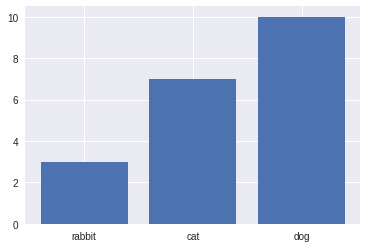

In [5]:
import collections
data = np.random.permutation(np.array(["dog"]*10 + ["cat"]*7 + ["rabbit"]*3))
counts = collections.Counter(data)
plt.bar(range(len(counts)), list(counts.values()), tick_label=list(counts.keys()))

Despite what you may have seen in some figures, note that it decidedly would _not_ make sense to include lines between the different bars, like so:

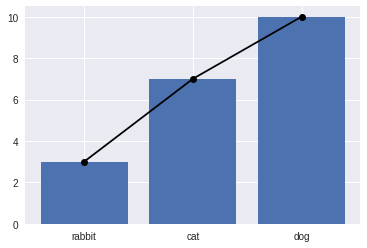

In [11]:
# DON'T DO THIS
plt.bar(range(len(counts)), counts.values(), tick_label=list (counts.keys()))
plt.plot(range(len(counts)), counts.values(), 'ko-')

Lines imply some kind of continuity in the intervals between the data points, and because the data here is nominal, there is zero notion as to what an "intermediate" value between dog and cat is, let alone what some fractional value of these non-entities would mean.  The same goes for ordinal data, though for a slightly more subtle reason.  Consider the following plot.

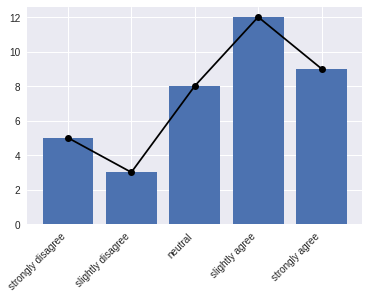

In [15]:
# DON'T DO THIS EITHER
data = {"strongly disagree": 5,
        "slightly disagree": 3,
        "neutral": 8,
        "slightly agree": 12,
        "strongly agree": 9}
plt.bar(range(len(data)), data.values())
plt.xticks(range(len(data)), data.keys(), rotation=45, ha="right")
plt.plot(range(len(data)), data.values(), 'ko-');

(As an aside, note that we separated out the call to let the tick labels using `plt.xticks()` to give us more control over rotation and alignment of labels, since they overlap with the default settings).  Regarding the lines, though, these may seem to make a little more sense than in the case of nominal data; because there is an ordering to the data points, there is also presumably some middle interpolation between a "strongly disagree" and "slightly disagree" response.  The danger here is that when we view line plots, we inherently ascribe meaning to the _slope_ of the lines.  The problem is that because the "distance" between the different values in ordinal data explicitly has no meaning (remember, this is what differentiated ordinal from interval data); thus, the slope of these lines in the above figure has no meaning, and distracts from the actual data, which is just counts of the various categories.  The one obvious but important guideline for bar charts with ordinal data is to make sure the label axis is ordered in the same order as the ordinal values.

### Pie charts — just say no

Pie charts can also be used to plot 1D categorical data.  Should you decide to go that route, here is the code that does it

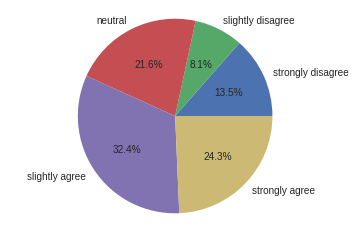

In [20]:
plt.pie(data.values(), labels=data.keys(), autopct='%1.1f%%')
plt.axis('equal');

But to be blunt, you should almost never use a pie chart.  This is bordering on a "data presentation" reason rather than a "data exploration" reason, but in general pie charts offer remarkably little information, especially if you have more than 2 (or at most 3) different categories.  Humans are fairly bad at assessing the relative sizes (i.e., arc lengths) within a pie chart, and it is almost never the proper presentation or understanding medium.  This goes doubly so for the kind of "3D pie charts" that Excel seemed to be so proud of for a time.  Use bar charts or stacked area charts instead.  A Google search for ["don't use pie charts"](https://www.google.com/search?q=don%27t+use+pie+charts) will provide plenty of fodder for this point, so I'll leave it at that.

### Histograms — numerical data

For 1D numerical data (either interval or ratio), the histogram is the natural generalization of a bar chart.  Histograms show frequency counts as well, but do so by lumping together ranges in the numerical data (the ranges are typically chosen automatically, i.e., to linearly span over the entire range of the data set).  We can construct a histogram using the `plt.hist()` command as in the following code.

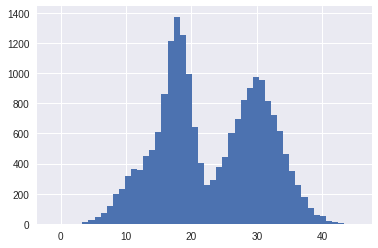

In [25]:
np.random.seed(0)
data = np.concatenate([30 + 4*np.random.randn(10000),
                       18 + 2*np.random.randn(7000),
                       12 + 3*np.random.randn(3000)])
plt.hist(data, bins=50);

In [27]:
data.shape

(20000,)

Essentially, what is being done here is that the entire range of the data is divided into `bins` number of equal-sized bins, spanning the entire range of the data.  We then count the number of points that fall into each bin, and generate a bar chart over this binned data.  There is some skill to picking the number of bins versus the number of samples in the data, but this can be done by simply trying out a few different values and seeing which produces the most understandable figure.

Histograms are the workhorse of exploratory data analysis.  They are indispensable for quickly understanding the distribution of values that a particular feature takes on.  And because the distances between points on the $x$ axis do indeed make sense for interval or ratio data, it also is not incorrect to create a line plot showing the overall shape of the distribution.

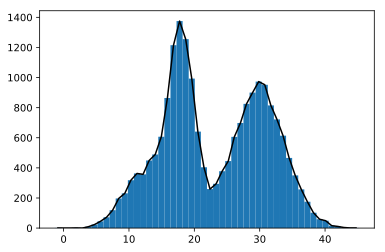

In [0]:
y,x,_ = plt.hist(data, bins=50);
plt.plot((x[1:]+x[:-1])/2,y,'k-')

However, histograms are usually dense enough that these lines don't add all that much to our understanding of the data, so they aren't very common.

## 2D Data

Next we'll move to the case of two dimensional data; these could either both be numerical, both categorical, or of mixed types.  Unlike with 1D data, there is now a bit more freedom we have when choosing the type of visualization, and it depends more upon the specifics of the data.  There are also some interesting failure modes that can come up in these situations that make the various types of less informative; we will try to cover these points and what can be done when such failure modes are encountered.

### Scatter plots — numeric x numeric

If both dimensions of the data are numeric, the most natural first type of plot to consider is the scatter plot: plotting points that simply correspond to the different coordinates of the data.

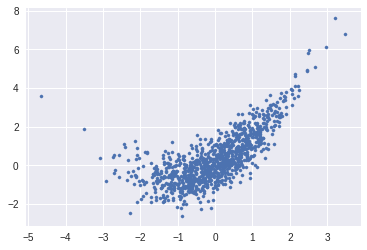

In [32]:
x = np.random.randn(1000)
y = 0.4*x**2 + x + 0.7*np.random.randn(1000)
plt.scatter(x,y,s=10)

The scatter plot gives one of the most complete views of the data, since every data point is plotted in the visualization.  It also gives a good visual indication of the "density" of the points.  However, there is also a natural failure mode, where there are _too_ many points to clearly separate, and the plot loses its ability to indicate the density of the data.  For example, if we have 10 times as many points, the plot is no longer as clear at indicating the density in the interior of the "density" (although for this particular case we could also just reduce the size of the points to improve this particular case, but we don't largely for illustration purposes).

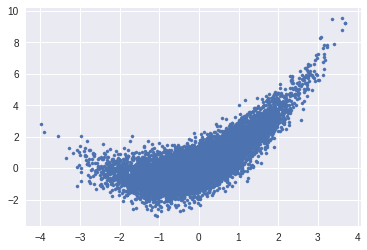

In [39]:
x = np.random.randn(10000)
y = 0.4*x**2 + x + 0.7*np.random.randn(10000)
plt.scatter(x,y,s=10)

In this case of excess data, we can also create a _2D histogram_ of the data (which bins the data along both dimensions), and indicate the "height" of each block via a color map.  Such plots can more clearly indicate the density of points within the regions that are just solid color in the original scatter plot.  These 2D histograms are sometimes also called heatmaps, but this name often conflicts with similar versions used for plotting 2d categorical data, so we'll use the term 2D histogram here.

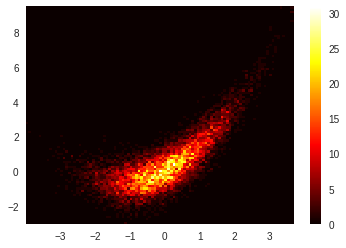

In [40]:
plt.hist2d(x,y,bins=100);
plt.colorbar();
plt.set_cmap('hot')

### Line plots — numeric x numeric (sequential)

For two dimensional data where one of the dimensions in naturally sequential (this comes up often, for instance, when monitoring a time series, so that one of the two dimensions of each data point is time).  Because the sequential dimension is numeric (interval or ratio), in this case (unlike the bar charts mentioned above), it _does_ make sense to explicitly draw lines between the data points.  Note that occasionally (if the data is sampled at regular intervals), this sometime considered to be one-dimensional data, but in this case the first dimension is an implicit sequential series, so we still consider the data to be two dimensional.  The following examples illustrates how to use the `plt.plot` for a simple line plot.

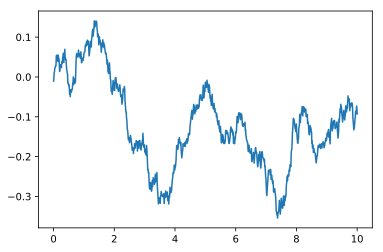

In [0]:
x = np.linspace(0,10,1000)
y = np.cumsum(0.01*np.random.randn(1000))
plt.plot(x,y)

### Box and whiskers and violin plots — categorical x numeric

When one dimension is numeric and one is categorical, we usually can no longer use a scatter plot: if we were to simply discretize the categorical dimension, the the points would overlap to the extent that it would be difficult to assess the distribution of the points for each categorical variable.  Let's consider a simple example, where here (just with fictitious data), we're plotting pet type versus weight.

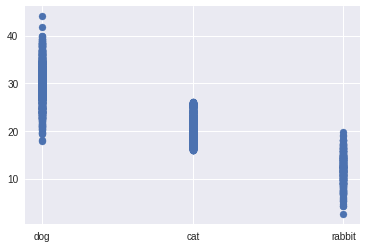

In [41]:
data= {"dog": 30 + 4*np.random.randn(1000),
       "cat": 16 + 10*np.random.rand(700),
       "rabbit": 12 + 3*np.random.randn(300)}
plt.scatter(np.concatenate([i*np.ones(len(x)) for i,x in enumerate(data.values())]),
            np.concatenate(list(data.values())))
plt.xticks(range(len(data)), data.keys());

Obviously very little can be determined by looking at just this plot, as there is not enough information in the dense line of points to really understand the distribution of the numeric variable for each point.  A common strategy here is to use a box-and-whiskers plot, which plots the median of the data (as the line in the middle of the box), the 25th and 75th percentiles of the data (as the bottom and top of the box), the "whiskers" are set by a number of different possible conventions (by default Matplotlib uses 1.5 times the interquartile range, the distance between the 25th and 75th percentile), and any points outside this range ("outliers") plotted individually.

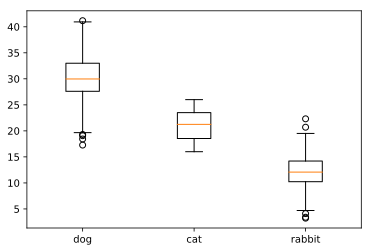

In [0]:
plt.boxplot(data.values())
plt.xticks(range(1,len(data)+1), data.keys());

Of course, just like the means and standard deviations do not fully describe a data set, the box and whisker statistics don't fully capture the distribution of the data.  For this reason, it's also common to see violin plots, which create mini-histograms (symmetrized, largely for aesthetic purposes) in the vertical direction for each category.  The advantage of these plots is that they carry a great deal of information about the actual distributions over each categorical variable, so are typically going to give more information especially when there is sufficient data to build this histogram.

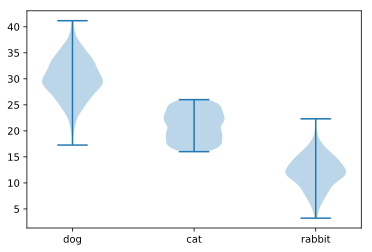

In [0]:
plt.violinplot(data.values())
plt.xticks(range(1,len(data)+1), data.keys());

### Heat map and bubble plots — categorical x categorical

When both dimensions of our 2D data are categorical, we have even less information to use.  Again, the goal will be to provide some kind of indication about the total counts of every possible combination between the two data sets.  For example, considering a fictitious data set of pet-type vs. house type:

In [0]:
types = np.array([('dog', 'house'), ('dog', 'appt'), 
                  ('cat', 'house'), ('cat', 'appt'), 
                  ('rabbit', 'house'), ('rabbit', 'appt')])
data = types[np.random.choice(range(6), 2000, p=[0.4, 0.1, 0.12, 0.18, 0.05, 0.15]),:]

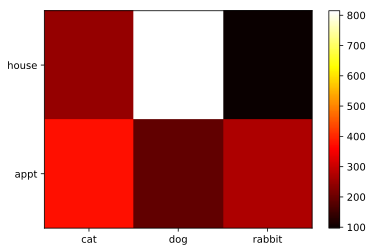

In [0]:
label_x, x = np.unique(data[:,0], return_inverse=True)
label_y, y = np.unique(data[:,1], return_inverse=True)
M, xt, yt, _ = plt.hist2d(x,y, bins=(len(label_x), len(label_y)))
plt.xticks((xt[:-1]+xt[1:])/2, label_x)
plt.yticks((yt[:-1]+yt[1:])/2, label_y)
plt.colorbar()

Although this can be somewhat useful, the range of colors is admittedly not very informative in some settings, and so a scatter plot with sizes associated with each data type may be more appropriate (this is also called a bubble plot).  This can be easily constructed from the results of our previous calls.

([<matplotlib.axis.YTick at 0x190d5008940>,
 <a list of 2 Text yticklabel objects>)

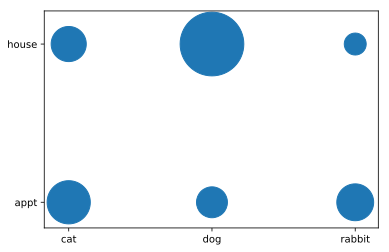

In [0]:
xy, cnts = np.unique((x,y), axis=1, return_counts=True)
plt.scatter(xy[0], xy[1], s=cnts*5)
plt.xticks(range(len(label_x)), label_x)
plt.yticks(range(len(label_y)), label_y)

Again, you would want to tweak these substantially if you were going to actually use them to present your data, but as a quick analysis of the data (presuming you have the code handy to generate them, and probably mainly considering examples that have slightly more discrete values than this one), they can be quick and easy visualizations of the data.

## 3D+ data

Once we move beyond two dimensions, effective visualization becomes much more difficult.  This is simply due to the fact that computer screens, the primary device by which we'll be viewing these visualizations, in two dimensions, and so directly visualizing higher dimension data takes some amount of care.

For the majority of this section, we'll be considering the case of 3 or higher dimensional numeric data: we will cover a few cases where one or more dimensions are categorical, but largely you would want to combine some of the methods described with the approaches described in the previous section for handling categorical data.  We'll state it explicitly when we make an exception to this rule.

### 3D scatter plots, avoid when possible

Much like the pie charts, I'm going to make a plea that you avoid 3D scatter plots whenever possible.  The reason for this is that they don't work well as 2D charts: out of necessity we loose information about the third dimensions, because we are only looking at a single projection of the data onto the 2D screen.  For examples, consider the following data:

In [0]:
x = np.random.randn(1000)
y = 0.4*x**2 + x + 0.7*np.random.randn(1000)
z = 0.5 + 0.2*(y-1)**2 + 0.1*np.random.randn(1000)

And now let's look at the 3D scatter plot that Matplotlib generated by default for this data (this can also act as a boilerplate for setting up 3D plots in Matplotlib, at least if you can't be dissuaded from doing so.

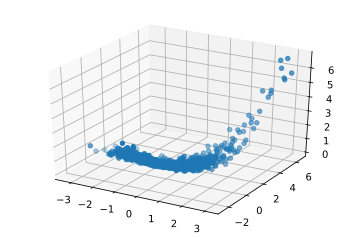

In [0]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z)

From this view along, it is virtually impossible to understand the data.  The _one_ exception to the rule against 3d scatterplots is explicitly if you want to _interact_ with a 3d plot: by rotating the plot you can form a reasonable internal model of what the data looks like.  This can be accomplished with the previously mentioned `%matplotlib notebook` call, but which we can't demonstrate in these notes for obvious reasons.

### Scatter matrices

The catch-all for visualizing high dimensional data is the _scatter matrix_.  This plot shows all _pairwise_ visualizations across all dimensions of the data set.  Assume three dimensions that  are real for example, it will include a scatter plot of the first dimension versus the second, the first versus the third, and the second versus the third.  It plots these in a matrix form, as shown below.  Matplotlib doesn't actually have a routine for this, but the pandas library does, and we can just use this one.

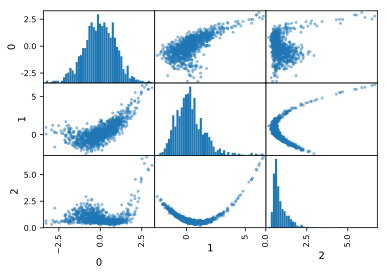

In [0]:
import pandas as pd
df = pd.DataFrame([x,y,z]).transpose()
pd.plotting.scatter_matrix(df, hist_kwds={'bins':50});

In this figure the middle left column is the first dimension plotted against the second, the bottom left is the first dimension plotted against the third, etc.  Because the diagonal entries in this matrix don't really make sense to show as scatter plots (they would be plotting the first dimension against the first, which would always lie on the line), instead it's common to show a histogram for each dimension along this diagonal.

There is one important point to make about scatter matrices: do _not_ try to use these for data presentation.  In data exploration, where you want to visualize "everything" and see if you can identify key trends in the data, this visualization is useful.  But when you want to actually present anything about the data, the scatter matrix is virtually always far too dense to effectively convey any information.  It will take a great deal of time staring at your problem before you really understand the nature of the data as presented in the scatter matrix, and its sole use is in trying to see patterns when you are willing to invest substantial cognitive load.

### Bubble plots
The bubble plot from the previous section can also be one means of understanding three dimensional data.  In this plot and variants, we will build a 2D scatter plot, but annotate a third dimension via some other attribute like the size of the points.  For the data above, it would look like the following.

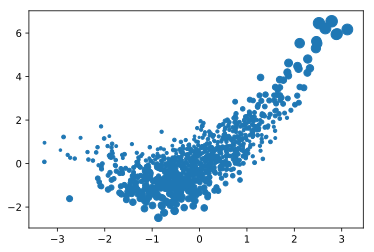

In [0]:
plt.scatter(x,y,s=z*20)

It is not perfect, but there is at least some sense in which we can view the above figure as a "poor 3D" figure, where the size of points represents how "close" they are, i.e., how large the third dimension value is.  The same effects can be accomplished by setting the color of the points.

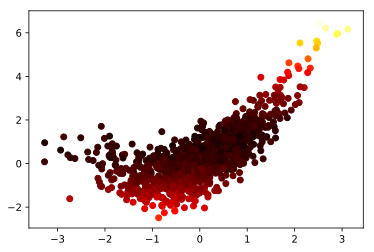

In [0]:
plt.scatter(x,y,c=z)

Ultimately, though, neither of these visualization seems _that_ intuitive, so the actual usefulness of such methods will depend highly on the data.

### Colored scatter plots

One setting where using color to denote a third dimension _does_ work well is when that third dimension is a categorical variable.  Assuming there are not too many categories, we can use starkly different colors to denote the third dimension.  This is common in figures describing machine learning classification algorithms, for example, because it is useful to visualize the input space to the algorithm as being in 2D, and the class label being a discrete quantity.  In fact, we already saw one of these when we wanted to visualize the two different distributions with the same first and second order statistics.

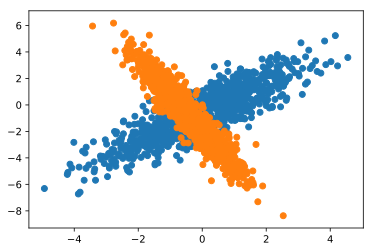

In [0]:
np.random.seed(0)
xy1 = np.random.randn(1000,2) @ np.random.randn(2,2) + np.random.randn(2)
xy2 = np.random.randn(1000,2) @ np.random.randn(2,2) + np.random.randn(2)
plt.scatter(xy1[:,0], xy1[:,1])
plt.scatter(xy2[:,0], xy2[:,1])

Such figures are quite useful and intuitive to understand.  Of course we can combine this idea with scatter matrices to come up with even more potentially useful slices into the data set.

## References

- [matplotlib](https://matplotlib.org/)
- [(Stevens, 1946)](http://www.jstor.org/stable/1671815?origin=JSTOR-pdf&seq=1) (original levels of measurement paper)
- [(Hand, 1996)](http://www.lps.uci.edu/~johnsonk/CLASSES/MeasurementTheory/Hand1996.StatisticsAndTheTheoryOfMeasurement.pdf)
(more recent paper on theory of measurement)
- [(CMU Datascience course)](http://www.datasciencecourse.org)